# 🎥 Netflix Data Analysis
This project explores Netflix’s content catalog using exploratory data analysis (EDA).
We analyze trends over time, content types, country distributions, and ratings to understand how Netflix’s library has evolved.


**EDA by Fouzi — ENSSEA Student**

IMPORTING DATA 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

In [148]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [149]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [150]:
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [151]:
df.shape

(8807, 12)

CLEANING DATA

In [152]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [153]:
df['country'] = df['country'].fillna('unknown') 
# replacing missing countries

In [154]:
df['cast'] = df['cast'].fillna('missing_cast') 
#replacing missing casts

In [155]:
df['duration'] = df['duration'].fillna('no_duration') 
# replacing missing durations

In [156]:
df['director'] = df['director'].fillna('unknown_director')
 # replacing missing directors

In [157]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',errors='coerce') 
# converted the date coloumn to date

In [158]:
df['rating'] = df['rating'].fillna(0) 
# only 4 rows are missing, it will not affect the insights

In [159]:
df.dropna(subset=['date_added'], inplace=True) 
# removing 10 rows which dont have dates

In [160]:
print(df.isnull().sum())
# cleaned the data

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


ANALYZE AND VISUALIZE  

In [161]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

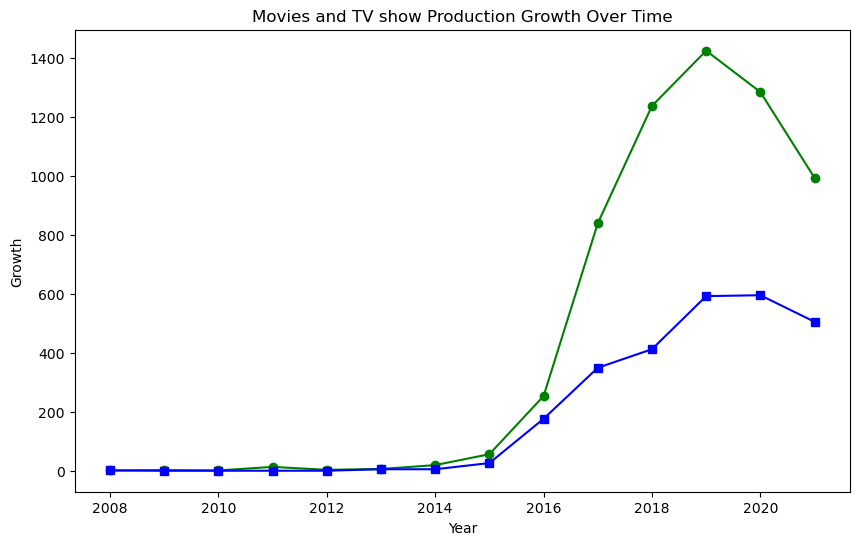

In [181]:


# titles added per year
growth = df.groupby(['year', 'type']).size().unstack(fill_value=0)
growth = growth.sort_index()
plt.figure(figsize=(10,6))
plt.plot(growth.index, growth['Movie'], label='Movie', color='green', marker='o')
plt.plot(growth.index, growth['TV Show'], label='TV Show', color='blue', marker='s')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.title('Movies and TV show Production Growth Over Time')
plt.show()

 

The number of titles added increased sharply after 2015, suggesting that Netflix expanded its catalog significantly during that period.
Movie additions peaked around 2018, while TV shows grew more steadily — indicating a strategic shift toward serialized content.
In comparison, the slower growth in TV shows shows that movies remained the dominant form of content throughout most of the years.

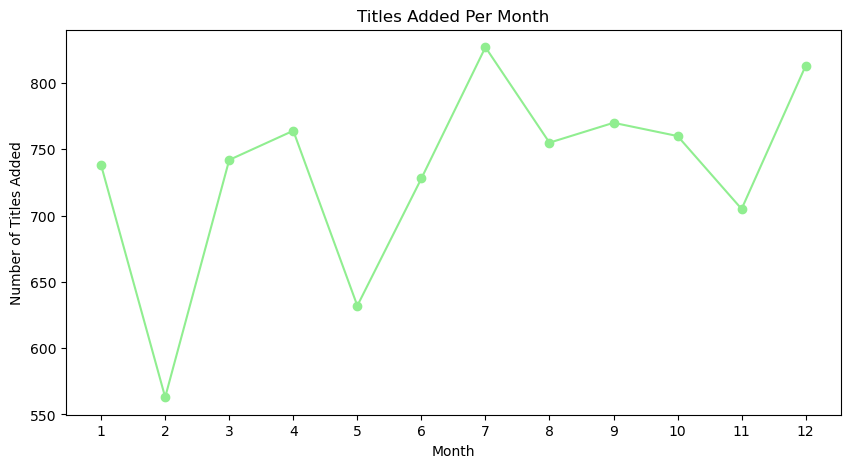

In [180]:
months = df['month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(months.index, months.values, color='lightgreen', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.title('Titles Added Per Month')
plt.xticks(months.index) 
plt.show()


The number of titles added varies throughout the year, showing a mild seasonal trend. 
In general, content additions increase toward the end of the year — particularly around November and December — 
which could align with holiday releases and new-year catalog updates. 
This pattern suggests that the platform strategically times its releases during high-viewership periods.

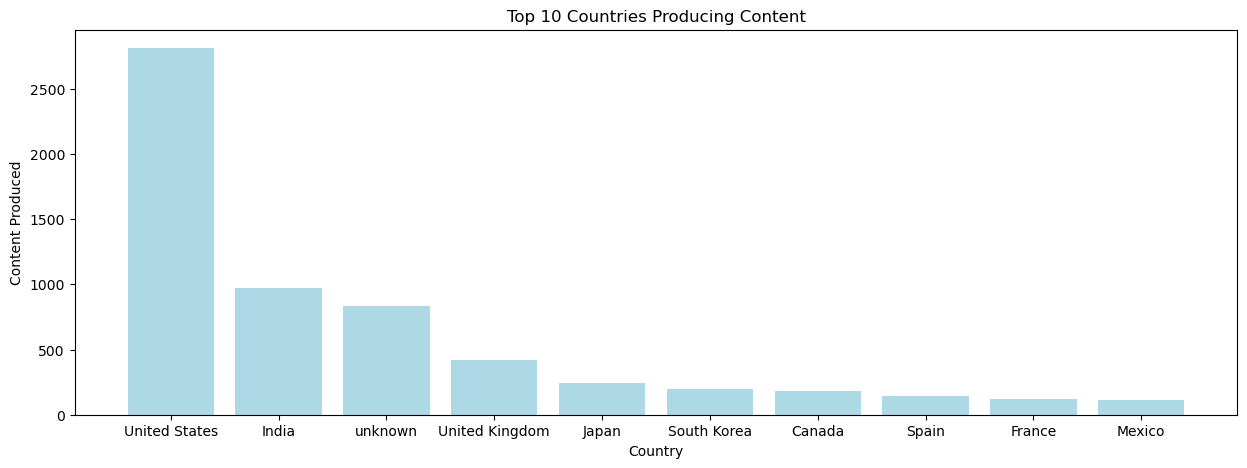

In [164]:

# top 10 countries producing content
categories = df['country'].value_counts().head(10)
plt.figure(figsize=(15,5))
plt.bar(categories.index, categories.values, color='lightblue')
plt.xlabel('Country')
plt.ylabel('Content Produced')
plt.title('Top 10 Countries Producing Content')
plt.show()


This BAR shows the diversity of content produced by countries.
The United States overwhemely dominates content production, as for indian and united kingdom.
Mexico has the least amount of content produced.

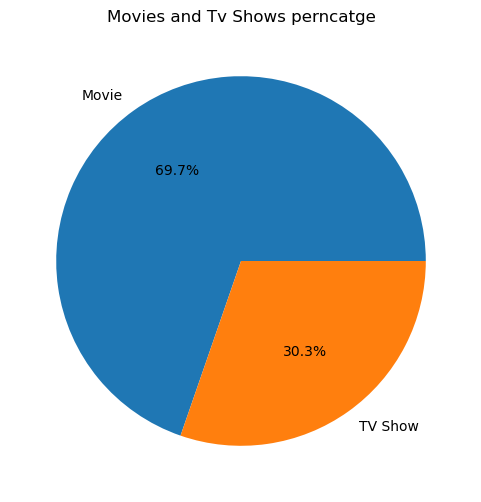

In [165]:
# movies and tv shows percentage
m_tv = df['type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    m_tv.values,
    labels=m_tv.index,
    autopct="%1.1f%%"
)
plt.title('Movies and Tv Shows perncatge')
plt.show()


Movies make up 69.7% of the market, while TV shows account for 30.3%.
This indicates that movies continue to dominate the platform’s content catalog, though the share of TV shows has shown steady growth in recent years.

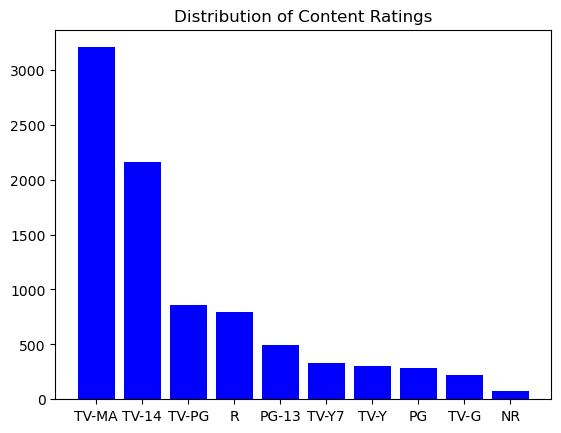

In [ ]:
rate = df['rating'].value_counts().head(10)
plt.bar(rate.index, rate.values, color='blue')
plt.title('Distribution of Content Ratings')
plt.show()

Most Netflix titles are rated **TV-MA**, indicating a focus on mature audiences. 
Ratings like **TV-14** and **R** follow closely, while children’s content (e.g., TV-Y, G) remains limited — showing Netflix’s emphasis on adult-oriented programming.


FULL INSIGHT

Completed:

-loaded the data

-cleaned all missng rows

-analyzed:

📊 1. Titles Added per Year

Shows Netflix’s growth trend

used .sort_index() correctly for chronological order

Insight: Huge catalog expansion after 2015

🎬 2. Movies vs TV Shows Over Time

compared both categories’ growth

interpreted that movies dominate, but TV shows are rising

🌍 3. Top 10 Countries Producing Content

Geographic distribution of production

Insight: USA dominates, followed by India & UK

🥧 4. Movies vs TV Shows Percentage

Pie chart showing overall content share

Insight: ~70% Movies, ~30% TV Shows

⭐ 5. Ratings Distribution

Shows Netflix’s maturity focus (TV-MA, TV-14 leading)

Insight: Content leans toward mature audiences

📅 6. Titles Added per Month

Seasonal trend analysis

Insight: Some months see more releases — possibly end-of-year spikes